In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./flying-etiquette.csv')
#Phase 1 Preparing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                         

In [3]:
df.duplicated().sum()  # there are no duplicates in the data

0

In [4]:
df_null_clean = df.dropna(thresh=13)  #dropping rows where at least half the values are null
df_null_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 1 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              854 non-null    int64 
 1   How often do you travel by plane?                                                                                                         854 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               854 non-null    object
 3   How tall are you?                                               

In [5]:
df_null_clean['Height(Inches)']= df_null_clean["How tall are you?"]
df_null_clean['Height(Inches)'] = df_null_clean['Height(Inches)'].replace("Under 5 ft.", "5'0\"")
df_null_clean['Height(Inches)'] = df_null_clean['Height(Inches)'].replace("6'6\" and above", "6'6\"")



#df_null_clean = df_null_clean[df_null_clean['Height(Inches)'] != 'Under 5 ft']
#df_null_clean[df_null_clean['Height(Inches)'] == "6'6\" and above"]

/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_16801/1055351122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_clean['Height(Inches)']= df_null_clean["How tall are you?"]
/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_16801/1055351122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_clean['Height(Inches)'] = df_null_clean['Height(Inches)'].replace("Under 5 ft.", "5'0\"")
/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_16801/1055351122.py:3: SettingW

In [6]:
def convert_height(height):
    height = height[:-1]
    feet = int(height[0])
    if len(height) > 3:
        inches = int(height[2:])
    else:
        inches = int(height[2])
    return (feet * 12) + inches

df_null_clean['Height(Inches)'] = df_null_clean['Height(Inches)'].apply(convert_height)

df_null_clean['Height(Inches)']

/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_16801/3225971596.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_clean['Height(Inches)'] = df_null_clean['Height(Inches)'].apply(convert_height)


1       75
2       68
3       71
4       67
5       69
        ..
1029    64
1032    63
1034    73
1035    67
1039    75
Name: Height(Inches), Length: 854, dtype: int64

In [7]:
df_inches = df_null_clean
#need tall, recline, rude to switch with friends, age
columns_to_select = ["Age",
                     'Height(Inches)',
                     "Do you ever recline your seat when you fly?",
                     "Is it rude to ask someone to switch seats with you in order to be closer to friends?"
                     ]

df_info_needed = df_inches[columns_to_select].copy()
df_info_cleaned = df_info_needed.dropna()


#Phase 2 - Describing Your Dataset
df_info_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 1 to 1039
Data columns (total 4 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Age                                                                                   843 non-null    object
 1   Height(Inches)                                                                        843 non-null    int64 
 2   Do you ever recline your seat when you fly?                                           843 non-null    object
 3   Is it rude to ask someone to switch seats with you in order to be closer to friends?  843 non-null    object
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
#Phase 3 - Exploring Your Dataset

age_responses = df_info_cleaned.groupby("Age")['Is it rude to ask someone to switch seats with you in order to be closer to friends?'].count()

age_responses

Age
18-29    172
30-44    222
45-60    234
> 60     215
Name: Is it rude to ask someone to switch seats with you in order to be closer to friends?, dtype: int64

In [9]:
df_info_cleaned['Is it rude to ask someone to switch seats with you in order to be closer to friends?']

1       No, not at all rude
2       No, not at all rude
3        Yes, somewhat rude
4       No, not at all rude
5        Yes, somewhat rude
               ...         
1029    No, not at all rude
1032    No, not at all rude
1034    No, not at all rude
1035    No, not at all rude
1039    No, not at all rude
Name: Is it rude to ask someone to switch seats with you in order to be closer to friends?, Length: 843, dtype: object

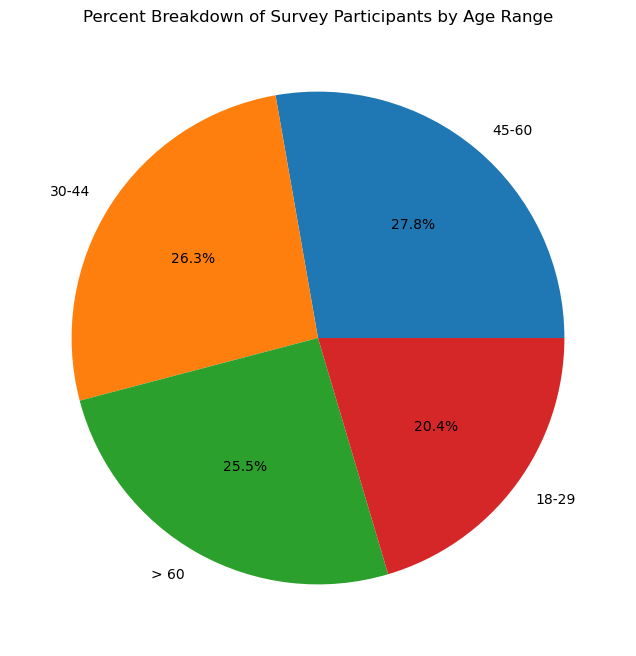

Age
45-60    0.273088
> 60     0.256207
30-44    0.252234
18-29    0.218471
Name: proportion, dtype: float64

In [10]:

age_group_counts = df_info_cleaned['Age'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Percent Breakdown of Survey Participants by Age Range')
plt.show()

df['Age'].value_counts(normalize=True)

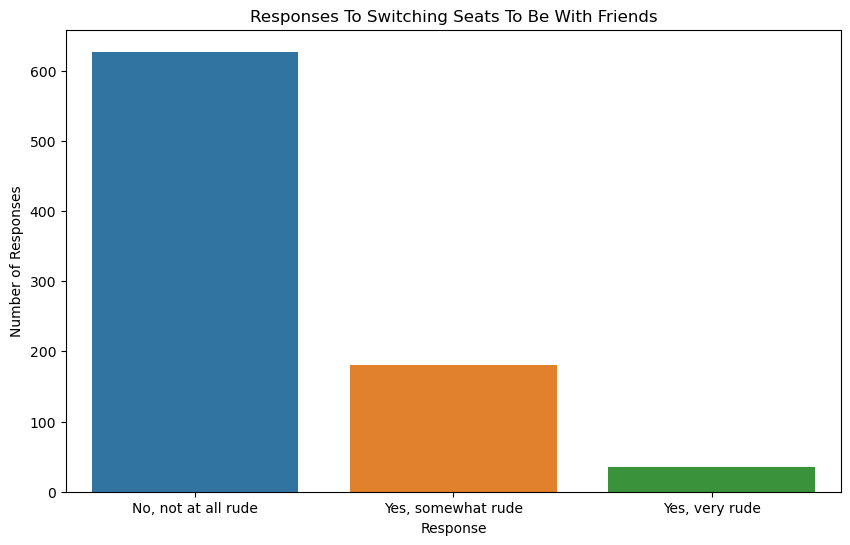

Is it rude to ask someone to switch seats with you in order to be closer to friends?
No, not at all rude    0.742353
Yes, somewhat rude     0.216471
Yes, very rude         0.041176
Name: proportion, dtype: float64

In [14]:
#How did survey respondents generally feel regarding 
#if “it [was] rude to ask someone to switch seats with you in order to be closer to friends?”?

plt.figure(figsize=(10, 6))

sns.countplot(x='Is it rude to ask someone to switch seats with you in order to be closer to friends?' ,data=df_info_cleaned)
plt.title('Responses To Switching Seats To Be With Friends')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()

df['Is it rude to ask someone to switch seats with you in order to be closer to friends?'].value_counts(normalize=True)

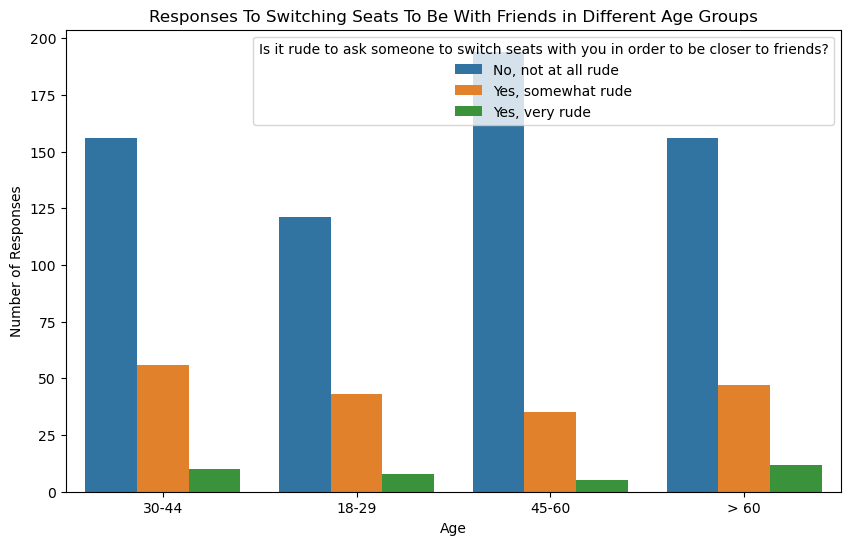

In [12]:
#plotting rude to switch for friends against age groups

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue=df_info_cleaned['Is it rude to ask someone to switch seats with you in order to be closer to friends?'] ,data=df_info_cleaned)
plt.title('Responses To Switching Seats To Be With Friends in Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Responses')
plt.show()

/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_16801/2597929824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info_cleaned['Height Group'] = pd.cut(df_info_cleaned['Height(Inches)'], bins=[60, 63, 66, 69, 72, 75, 78],
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

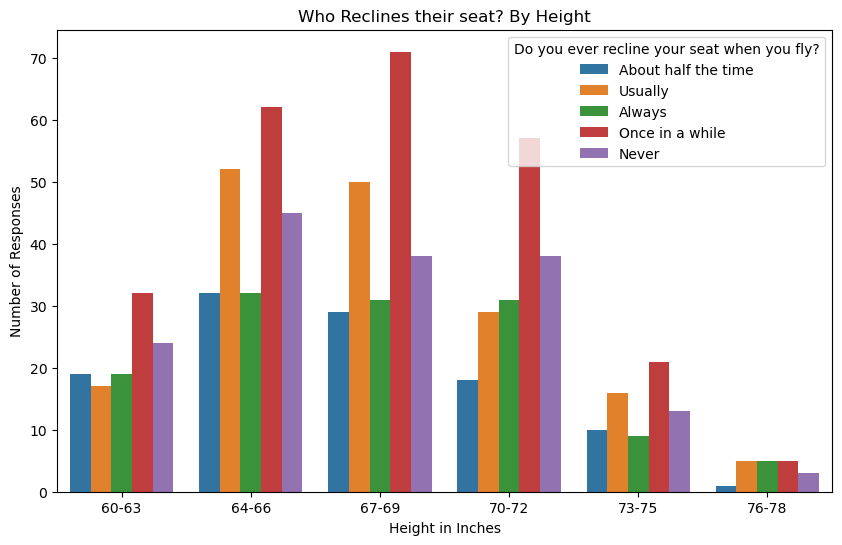

In [13]:
plt.figure(figsize=(10, 6))

df_info_cleaned['Height Group'] = pd.cut(df_info_cleaned['Height(Inches)'], bins=[60, 63, 66, 69, 72, 75, 78], 
                            labels=['60-63', '64-66', '67-69','70-72','73-75','76-78'])


sns.countplot(x = 'Height Group', hue='Do you ever recline your seat when you fly?',data=df_info_cleaned)
plt.title('Who Reclines their seat? By Height')
plt.xlabel('Height in Inches')
plt.ylabel('Number of Responses')
plt.show()